In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [6]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [7]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import numpy as np

In [12]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

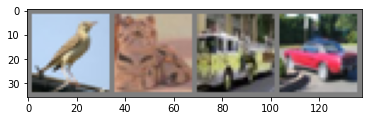

In [14]:
imshow(torchvision.utils.make_grid(images))

In [16]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 bird   cat truck   car


In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [19]:
net = Net()

In [20]:
import torch.optim as optim

In [21]:
criterion = nn.CrossEntropyLoss()

In [22]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print('[%d %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1  2000] loss: 2.208
[1  4000] loss: 1.853
[1  6000] loss: 1.702
[1  8000] loss: 1.604
[1 10000] loss: 1.561
[1 12000] loss: 1.473
[2  2000] loss: 1.406
[2  4000] loss: 1.375
[2  6000] loss: 1.355
[2  8000] loss: 1.321
[2 10000] loss: 1.302
[2 12000] loss: 1.290
